#Library

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import time
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from statsmodels.tools.eval_measures import rmse

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn import cluster

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


#Data preparation

In [ ]:
uberclustering_url = 'https://drive.google.com/file/d/1dJekM_mFn2UUBAO25XCXi6kmXXvee6wr/view?usp=share_link' #import data
uberclustering = 'https://drive.google.com/uc?id='+ uberclustering_url.split('/')[-2] #to get the id of the file

print(uberclustering)

df_uberclustering = pd.read_csv(uberclustering)
df_uberclustering.head()

https://drive.google.com/uc?id=1dJekM_mFn2UUBAO25XCXi6kmXXvee6wr


,no,Key,fare_amount,pickup_datetime,pickup_date,pickup_times,season,day,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,ratio_fare,pickup_neighbourhood,pickup_suburb,dropoff_neighbourhood,dropoff_suburb
0,1,24238194,7.5,2015-05-07 19:52:06 UTC,5/7/2015,19:52:06,Spring,Thursday,-73.999817,40.738354,-73.999512,40.723217,1,5.883333,1.274788,Manhattan Community Board 2,Manhattan,Manhattan Community Board 2,Manhattan
1,2,27835199,7.7,2009-07-17 20:04:56 UTC,7/17/2009,20:04:56,Summer,Friday,-73.994355,40.728225,-73.994710,40.750325,1,9.516667,0.809107,NoHo,Manhattan,Chelsea District,Manhattan
2,3,44984355,12.9,2009-08-24 21:45:00 UTC,8/24/2009,21:45:00,Summer,Monday,-74.005043,40.740770,-73.962565,40.772647,1,21.666667,0.595385,Manhattan Community Board 2,Manhattan,Manhattan Community Board 8,Manhattan
3,4,25894730,5.3,2009-06-26 08:22:21 UTC,6/26/2009,8:22:21,Summer,Friday,-73.976124,40.790844,-73.965316,40.803349,3,4.666667,1.135714,Manhattan Community Board 7,Manhattan,Bloomingdale,Manhattan
4,5,17610152,16.0,2014-08-28 17:47:00 UTC,8/28/2014,17:47:00,Summer,Thursday,-73.925023,40.744085,-73.973082,40.761247,5,16.833333,0.950495,Sunnyside Gardens,Queens,Manhattan Community Board 5,Manhattan


# Data Dustrubution

In [ ]:
df_ubercluster = df_uberclustering.copy()
df_ubercluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191492 entries, 0 to 191491
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   no                     191492 non-null  int64  
 1   Key                    191492 non-null  int64  
 2   fare_amount            191492 non-null  float64
 3   pickup_datetime        191492 non-null  object 
 4   pickup_date            191492 non-null  object 
 5   pickup_times           191492 non-null  object 
 6   season                 191492 non-null  object 
 7   day                    191492 non-null  object 
 8   pickup_longitude       191492 non-null  float64
 9   pickup_latitude        191492 non-null  float64
 10  dropoff_longitude      191492 non-null  float64
 11  dropoff_latitude       191492 non-null  float64
 12  passenger_count        191492 non-null  int64  
 13  trip_distance          191492 non-null  float64
 14  ratio_fare             191492 non-nu

In [ ]:
df_uberdrop= df_ubercluster.loc[:, ['Key', 'fare_amount', 'passenger_count', 'trip_distance']]
print(df_uberdrop)

             Key  fare_amount  passenger_count  trip_distance
0       24238194          7.5                1       5.883333
1       27835199          7.7                1       9.516667
2       44984355         12.9                1      21.666667
3       25894730          5.3                3       4.666667
4       17610152         16.0                5      16.833333
...          ...          ...              ...            ...
191487  42598914          3.0                1       4.016667
191488  16382965          7.5                1       8.900000
191489  27804658         30.9                2      25.266667
191490  20259894         14.5                1       9.600000
191491  11951496         14.1                1      16.783333

[191492 rows x 4 columns]


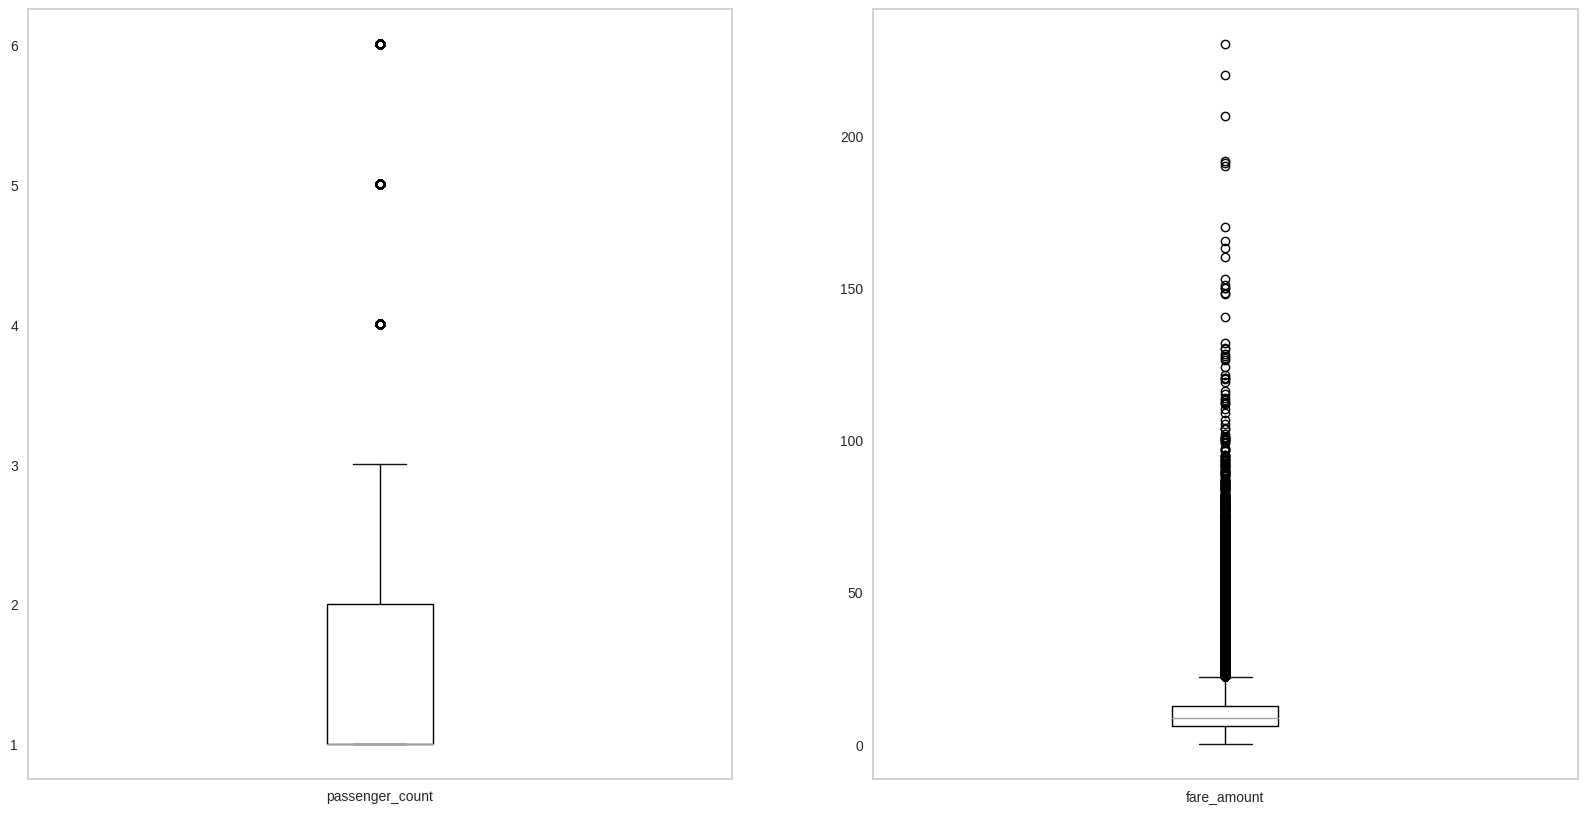

In [ ]:
# filter numeric column
feature = ['passenger_count', 'fare_amount']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_uberdrop.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

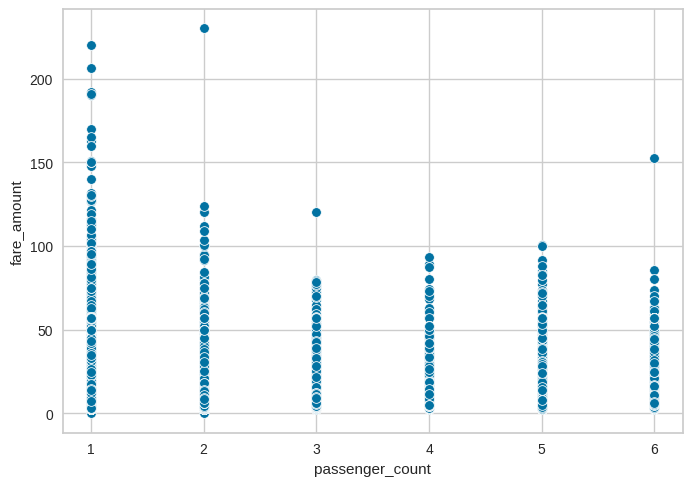

In [ ]:
sns.scatterplot(data = df_uberdrop, x='passenger_count', y='fare_amount')

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

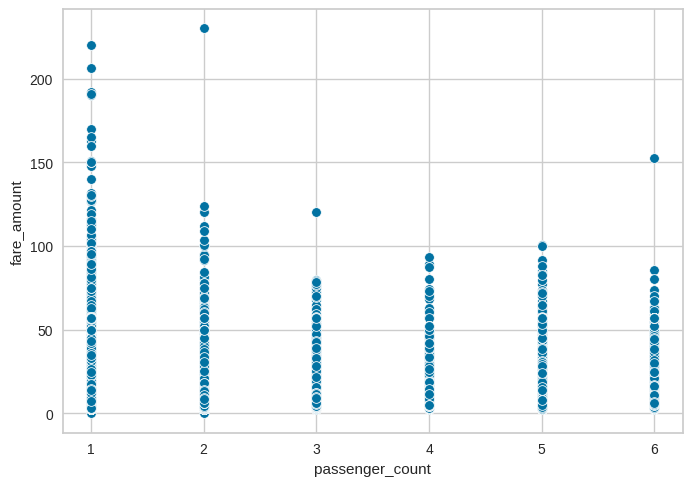

In [ ]:
# Define Standard Scale dataset
df_ss_scale = df_uberdrop.copy()
column = ['passenger_count', 'fare_amount']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
df_ss_scale[column] = ss_scaler.fit_transform(df_ss_scale[column])

sns.scatterplot (data = df_uberdrop, x='passenger_count', y='fare_amount')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

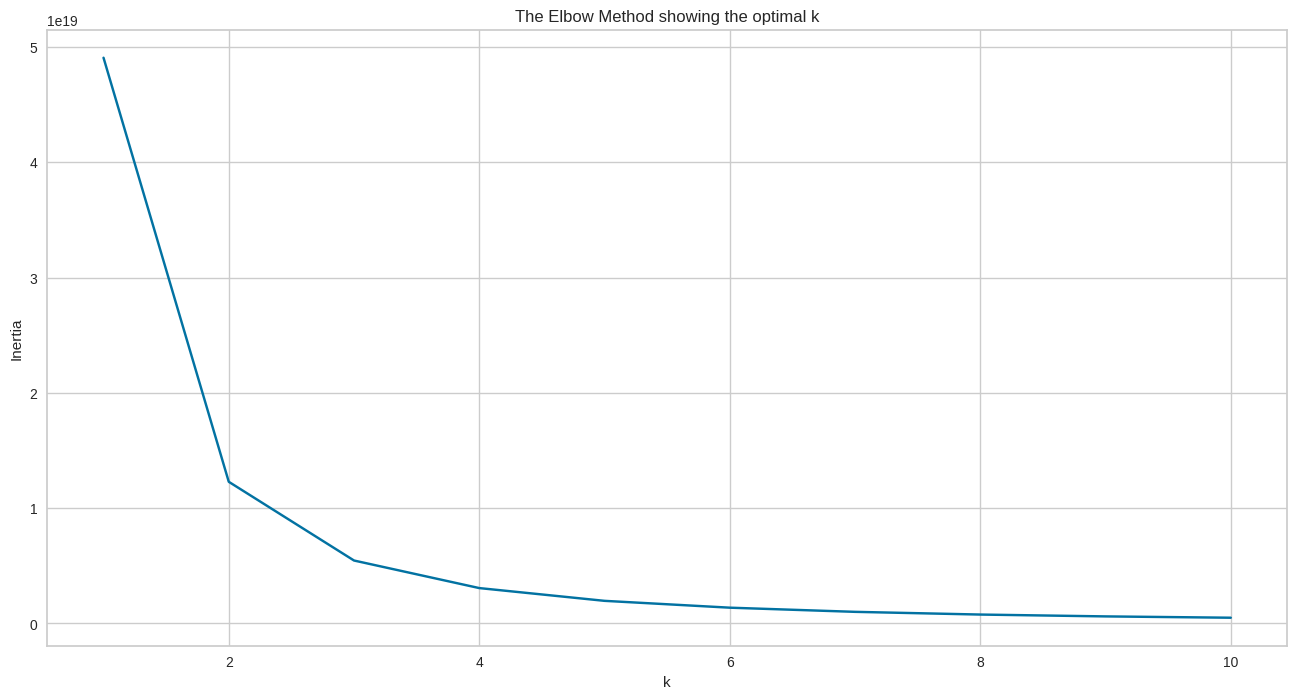

[4.9074809471307506e+19, 1.2284625347617972e+19, 5.454110490234829e+18, 3.063329428180498e+18, 1.9560508865418207e+18, 1.3629761417445153e+18, 1.0016453840395446e+18, 7.663043452812708e+17, 6.063587850806912e+17, 4.916675787332183e+17]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(df_uberdrop)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [ ]:
grad = [] # defining list for absolute gradien difference
num = list(K) # listing K
t = [] # defining list for titik/while condition
titik = 1 # starting condition
while titik in num and titik <= max(num): # while syntax
  if titik == max(num): # condition if the dots is in the corner (1st)
    titik += 1
  elif titik == min(num): # condition if the dots is in the corner (last)
    titik += 1
  else: # dots is in the middle
    t.append(titik) # inputing titik to t
    grad.append((abs(abs(distortions[titik] - distortions[titik-1]) - abs(distortions[titik-1]-distortions[titik -2]))/(abs(distortions[titik-1]-distortions[titik -2])))*100) # percentage of absolute gradien differences
    titik += 1 # adding value to titik for next calculation
summ = pd.DataFrame(list(zip(t, grad)),
               columns =['No of Cluster', 'Grad diff']) # making table for each calculation
summ # result

,No of Cluster,Grad diff
0,2,81.433866
1,3,64.998523
2,4,53.685490
3,5,46.438523
4,6,39.075005
5,7,34.868252
6,8,32.036690
7,9,28.293598


# Clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the average silhouette score is 0.6263333474018775


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the average silhouette score is 0.5901073153753873


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the average silhouette score is 0.5722615783609489


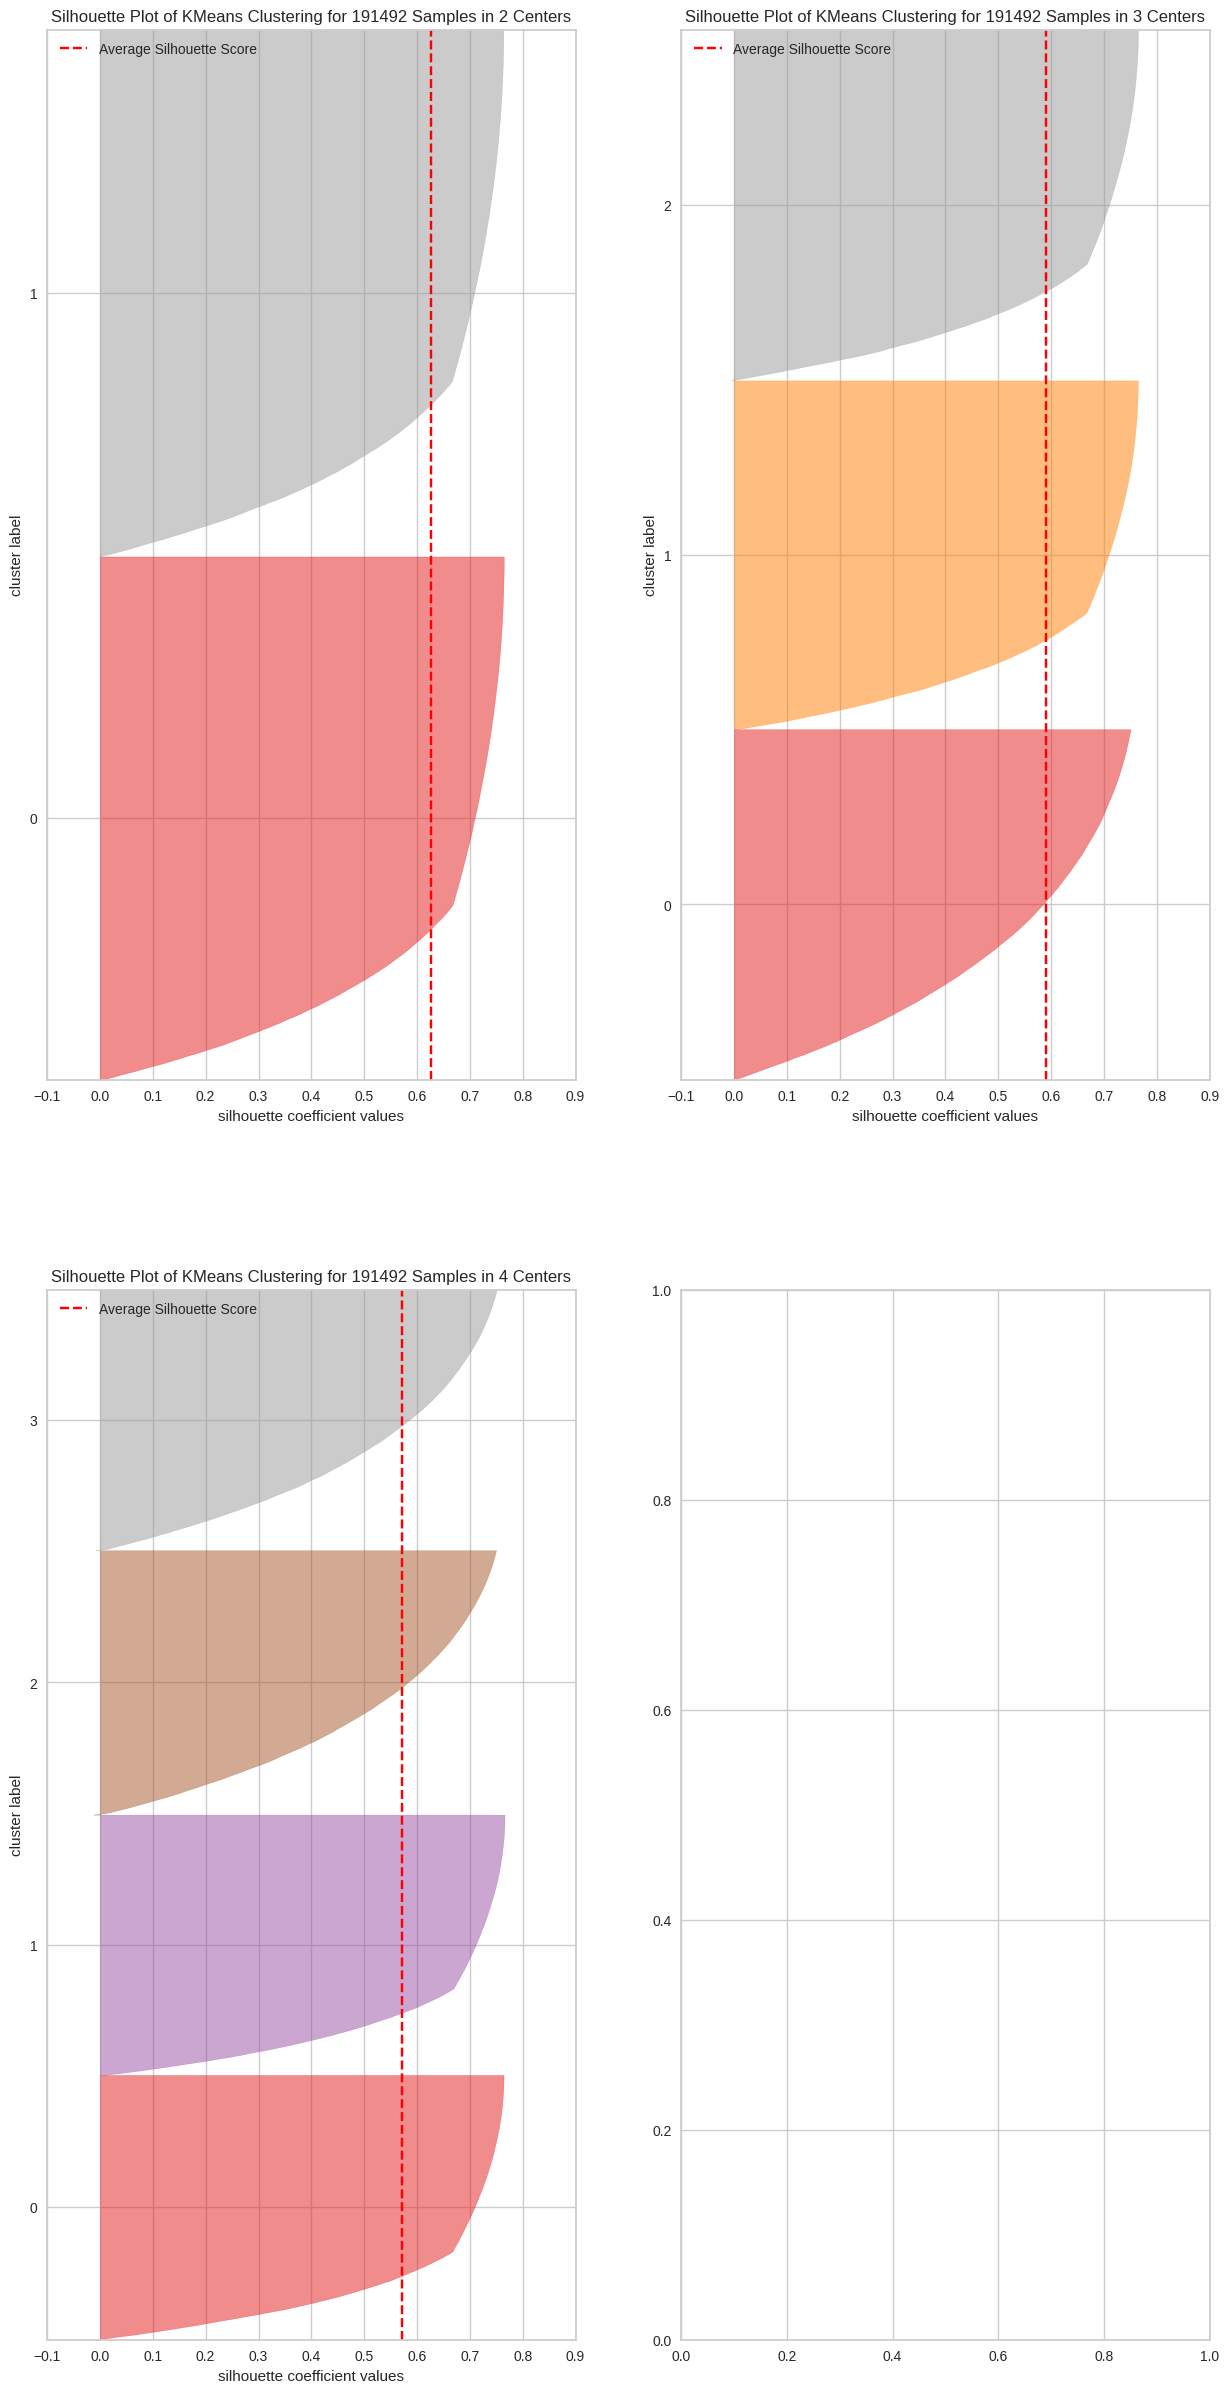

In [ ]:
# Silhouette score plot
K = range(2,5)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = True, ax = ax[q-1][mod])
  sil.fit(df_uberdrop)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
# make cluster
Clust3 = df_uberdrop.copy()

cluster_model = KMeans(n_clusters=3)   #------ Yang di ubah
cluster_model.fit_predict(Clust3[['passenger_count', 'fare_amount']])
Clust3['cluster'] = cluster_model.labels_
Clust3.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Key,fare_amount,passenger_count,trip_distance,cluster
0,24238194,7.5,1,5.883333,1
1,27835199,7.7,1,9.516667,1
2,44984355,12.9,1,21.666667,1
3,25894730,5.3,3,4.666667,1
4,17610152,16.0,5,16.833333,2


<Axes: xlabel='cluster', ylabel='passenger_count'>

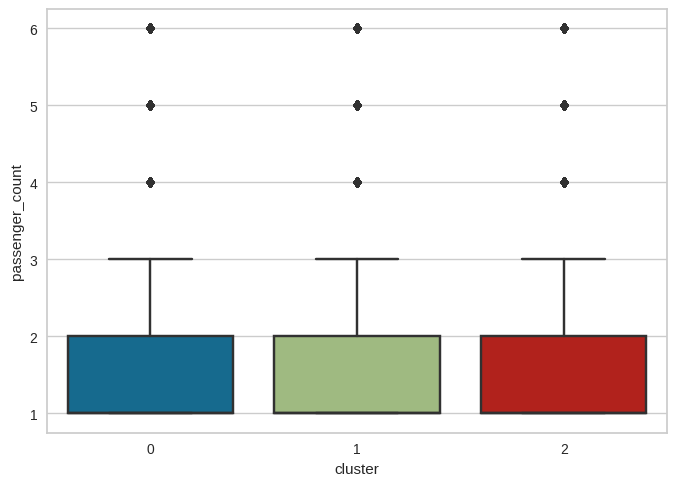

In [ ]:
# Number of transaction
sns.boxplot (data =Clust3 , x ='cluster' , y ='passenger_count')

<Axes: xlabel='cluster', ylabel='fare_amount'>

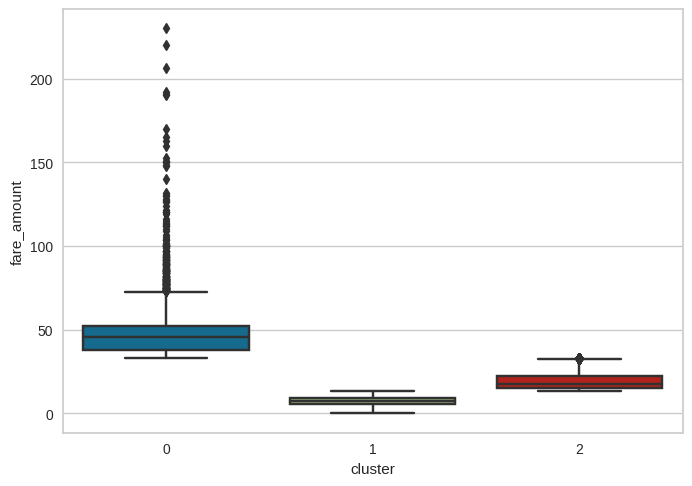

In [ ]:
# Number of transaction
sns.boxplot (data =Clust3 , x ='cluster' , y ='fare_amount')

In [ ]:
# make cluster
Clust4 = df_uberdrop.copy()

cluster_model = KMeans(n_clusters=4)   #------ Yang di ubah
cluster_model.fit_predict(Clust4[['passenger_count', 'fare_amount']])
Clust4['cluster'] = cluster_model.labels_
Clust4.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Key,fare_amount,passenger_count,trip_distance,cluster
0,24238194,7.5,1,5.883333,0
1,27835199,7.7,1,9.516667,0
2,44984355,12.9,1,21.666667,2
3,25894730,5.3,3,4.666667,0
4,17610152,16.0,5,16.833333,2


<Axes: xlabel='cluster', ylabel='passenger_count'>

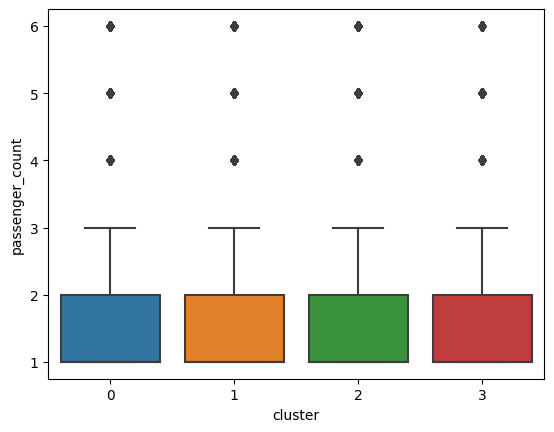

In [ ]:
# Number of transaction
sns.boxplot (data =Clust4 , x ='cluster' , y ='passenger_count')

<Axes: xlabel='cluster', ylabel='fare_amount'>

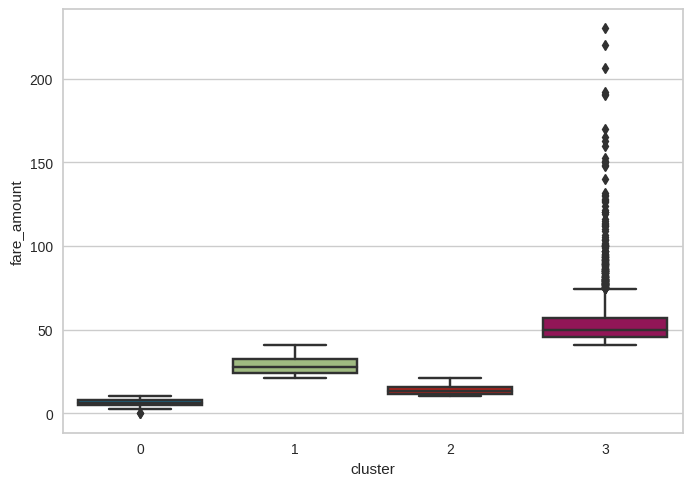

In [ ]:
# Number of transaction
sns.boxplot (data =Clust4 , x ='cluster' , y ='fare_amount')

\

In [ ]:
df_ubersegmen = df_uberdrop.copy()
df_ubersegmen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191492 entries, 0 to 191491
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Key              191492 non-null  int64  
 1   fare_amount      191492 non-null  float64
 2   passenger_count  191492 non-null  int64  
 3   trip_distance    191492 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 5.8 MB


In [ ]:
df_ubermerged = Clust3.merge(df_ubersegmen,how= 'inner', on = 'Key')
df_ubermerged

,Key,fare_amount_x,passenger_count_x,trip_distance_x,cluster,fare_amount_y,passenger_count_y,trip_distance_y
0,24238194,7.5,1,5.883333,1,7.5,1,5.883333
1,27835199,7.7,1,9.516667,1,7.7,1,9.516667
2,44984355,12.9,1,21.666667,1,12.9,1,21.666667
3,25894730,5.3,3,4.666667,1,5.3,3,4.666667
4,17610152,16.0,5,16.833333,2,16.0,5,16.833333
...,...,...,...,...,...,...,...,...
191487,42598914,3.0,1,4.016667,1,3.0,1,4.016667
191488,16382965,7.5,1,8.900000,1,7.5,1,8.900000
191489,27804658,30.9,2,25.266667,2,30.9,2,25.266667
191490,20259894,14.5,1,9.600000,2,14.5,1,9.600000


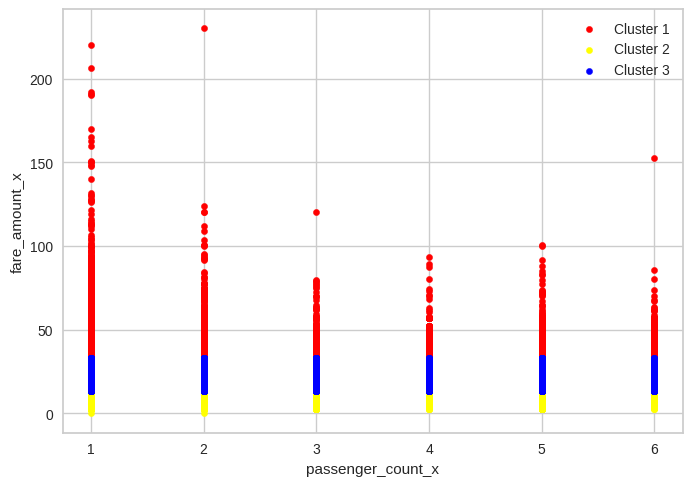

In [ ]:
cluster_scatter = df_ubermerged[df_ubermerged['cluster'] == 0].plot.scatter(x='passenger_count_x', y='fare_amount_x', c='red', label='Cluster 1')
cluster_scatter = df_ubermerged[df_ubermerged['cluster'] == 1].plot.scatter(x='passenger_count_x', y='fare_amount_x', c='yellow', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_ubermerged[df_ubermerged['cluster'] == 2].plot.scatter(x='passenger_count_x', y='fare_amount_x', c='blue', label='Cluster 3', ax = cluster_scatter)

In [ ]:
df_ubermerged.groupby('cluster',as_index = False)[['passenger_count_x','fare_amount_x', 'trip_distance_y']].agg(['count','mean','min','max','median']).T

cluster                             0              1             2
passenger_count_x count   7569.000000  148414.000000  35509.000000
                  mean       1.763509       1.682766      1.704441
                  min        1.000000       1.000000      1.000000
                  max        6.000000       6.000000      6.000000
                  median     1.000000       1.000000      1.000000
fare_amount_x     count   7569.000000  148414.000000  35509.000000
                  mean      47.485146       7.602498     19.233625
                  min       33.390000       0.000000     13.450000
                  max      230.000000      13.400000     33.330000
                  median    45.830000       7.300000     17.500000
trip_distance_y   count   7569.000000  148414.000000  35509.000000
                  mean      35.691943       9.465739     20.554446
                  min        0.900000       0.900000      0.900000
                  max       90.816667     125.700000     92.383333
                  median    33.866667       8.383333     19.483333

In [ ]:
pd.set_option('display.max_columns',None)
df_ubermerged.head()

,Key,fare_amount_x,passenger_count_x,trip_distance_x,season_x,day_x,cluster,fare_amount_y,passenger_count_y,trip_distance_y,season_y,day_y
0,24238194,7.5,1,5.883333,Spring,Thursday,0,7.5,1,5.883333,Spring,Thursday
1,27835199,7.7,1,9.516667,Summer,Friday,0,7.7,1,9.516667,Summer,Friday
2,44984355,12.9,1,21.666667,Summer,Monday,0,12.9,1,21.666667,Summer,Monday
3,25894730,5.3,3,4.666667,Summer,Friday,0,5.3,3,4.666667,Summer,Friday
4,17610152,16.0,5,16.833333,Summer,Thursday,2,16.0,5,16.833333,Summer,Thursday


In [ ]:
df_ubermerged.groupby(['cluster', 'passenger_count_x'], as_index = False)['Key'].count()

,cluster,passenger_count_x,Key
0,0,1,102662
1,0,2,21453
2,0,3,6523
3,0,4,3118
4,0,5,10353
5,0,6,3029
6,1,1,5073
7,1,2,1332
8,1,3,363
9,1,4,195


In [ ]:
df_ubermerged.groupby(['cluster', 'fare_amount_x'], as_index = False)['Key'].count()

,cluster,fare_amount_x,Key
0,0,0.00,1
1,0,0.01,1
2,0,2.50,163
3,0,2.90,334
4,0,3.00,223
...,...,...,...
1160,2,32.70,2
1161,2,32.80,18
1162,2,32.83,69
1163,2,32.90,73


In [ ]:
result = df_ubermerged.groupby(['cluster'], as_index = False)['fare_amount_x'].agg(['count', 'min', 'max'])
result.columns = ['cluster', 'min_fare', 'max_fare']
result

,cluster,min_fare,max_fare
cluster,,,
0,147138,0.0,13.2
1,7734,33.0,230.0
2,36620,13.3,33.0


In [ ]:
result = df_ubermerged.groupby(['cluster'], as_index = False)['trip_distance_y'].agg(['count', 'min', 'max'])
result.columns = ['cluster', 'min_distance', 'max_distance']
result

,cluster,min_distance,max_distance
cluster,,,
0,147138,0.9,125.700000
1,7734,0.9,90.816667
2,36620,0.9,92.383333


In [ ]:
df_ubermerged.groupby(['cluster', 'day_x'], as_index = False)['Key'].count()

,cluster,day_x,Key
0,0,Friday,22594
1,0,Monday,18802
2,0,Saturday,22367
3,0,Sunday,19151
4,0,Thursday,21878
5,0,Tuesday,20993
6,0,Wednesday,21353
7,1,Friday,1232
8,1,Monday,1171
9,1,Saturday,886
